### Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression

### Data Preprocessing

In [2]:
# Load data
df_purchase=pd.read_csv('purchase data.csv')

# Import Scaler
scaler=pickle.load(open('scaler.pickle','rb'))
# Import pca
pca=pickle.load(open('pca.pickle','rb'))
# Import kmeans
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

# Standardization
features=df_purchase[['Sex','Marital status', 'Age', 'Education','Income','Occupation', 'Settlement size']]
df_purchase_segm_std=scaler.transform(features)

# Apply PCA
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

# Segment data
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of data
df_purchase_predictors=df_purchase.copy()

# Add Segment Labels
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca
segment_dummies=pd.get_dummies(purchase_segm_kmeans_pca,prefix='Segment',prefix_sep='_')
df_purchase_predictors=pd.concat([df_purchase_predictors,segment_dummies],axis=1)

df_pa=df_purchase_predictors

### Purchase Probability Model

In [3]:
Y=df_pa['Incidence']

In [4]:
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1']+df_pa['Price_2']+df_pa['Price_3']+df_pa['Price_4']+df_pa['Price_5'])/5

In [5]:
model_purchase=LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [6]:
model_purchase.coef_

array([[-2.34840918]])

### Price Elasticity of Purchase Probability

In [7]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
price_range=np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range=pd.DataFrame(price_range)

In [10]:
Y_pr=model_purchase.predict_proba(df_price_range)

In [11]:
Y_pr

array([[0.0821394 , 0.9178606 ],
       [0.08392739, 0.91607261],
       [0.08575066, 0.91424934],
       [0.08760976, 0.91239024],
       [0.08950521, 0.91049479],
       [0.09143756, 0.90856244],
       [0.09340736, 0.90659264],
       [0.09541512, 0.90458488],
       [0.09746141, 0.90253859],
       [0.09954675, 0.90045325],
       [0.10167168, 0.89832832],
       [0.10383675, 0.89616325],
       [0.10604247, 0.89395753],
       [0.10828939, 0.89171061],
       [0.11057803, 0.88942197],
       [0.11290891, 0.88709109],
       [0.11528255, 0.88471745],
       [0.11769948, 0.88230052],
       [0.1201602 , 0.8798398 ],
       [0.12266521, 0.87733479],
       [0.125215  , 0.874785  ],
       [0.12781008, 0.87218992],
       [0.13045093, 0.86954907],
       [0.133138  , 0.866862  ],
       [0.13587178, 0.86412822],
       [0.13865272, 0.86134728],
       [0.14148125, 0.85851875],
       [0.14435782, 0.85564218],
       [0.14728284, 0.85271716],
       [0.15025672, 0.84974328],
       [0.

In [12]:
purchase_pr=Y_pr[:][:,1]

In [13]:
pe=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [14]:
df_price_elasticities=pd.DataFrame(price_range)

In [15]:
df_price_elasticities=df_price_elasticities.rename(columns={0:'Price_point'})
df_price_elasticities['Mean_PE']=pe
df_price_elasticities

,Price_point,Mean_PE
0,0.50,-0.096448
1,0.51,-0.100519
2,0.52,-0.104716
3,0.53,-0.109044
4,0.54,-0.113505
5,0.55,-0.118103
6,0.56,-0.122841
7,0.57,-0.127722
8,0.58,-0.132750
9,0.59,-0.137928


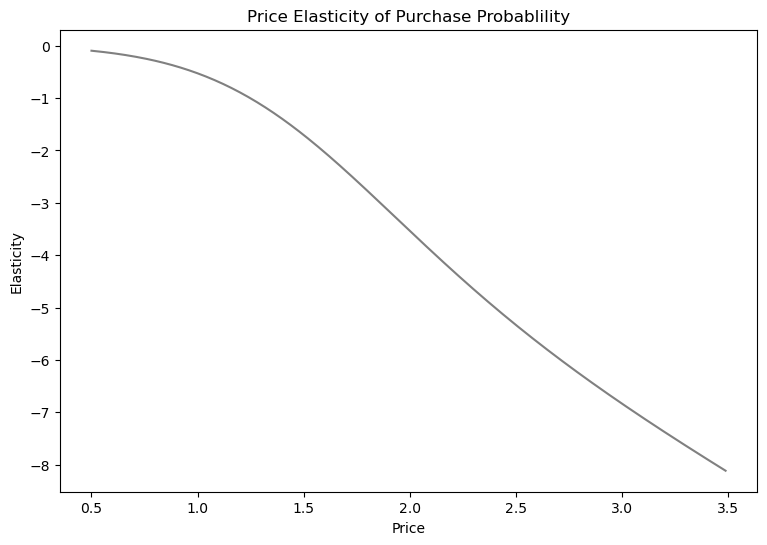

In [16]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()

## Purchase Probability by Segment

#### Segment 1 - Career-Focused

In [17]:
df_pa_segement_1 = df_pa[df_pa['Segment']==1]

In [18]:
Y=df_pa_segement_1['Incidence']

In [19]:
X=pd.DataFrame()

In [20]:
X['Mean_Price']=(df_pa_segement_1['Price_1'] +\
                 df_pa_segement_1['Price_2'] +\
                 df_pa_segement_1['Price_3'] +\
                 df_pa_segement_1['Price_4'] +\
                 df_pa_segement_1['Price_5'])/5

In [21]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X,Y)

LogisticRegression(solver='sag')

In [22]:
model_incidence_segment_1.coef_

array([[-2.62972459]])

In [23]:
Y_segment_1=model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:,1]
pe_segemnt_1=model_incidence_segment_1.coef_[:,0]* price_range*(1-purchase_pr_segment_1)

## Results

In [24]:
df_price_elasticities['PE_Segment_1']=pe_segemnt_1
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1
0,0.50,-0.096448,-0.095416
1,0.51,-0.100519,-0.099725
2,0.52,-0.104716,-0.104183
3,0.53,-0.109044,-0.108796
4,0.54,-0.113505,-0.113566
5,0.55,-0.118103,-0.118499
6,0.56,-0.122841,-0.123598
7,0.57,-0.127722,-0.128869
8,0.58,-0.132750,-0.134317
9,0.59,-0.137928,-0.139945


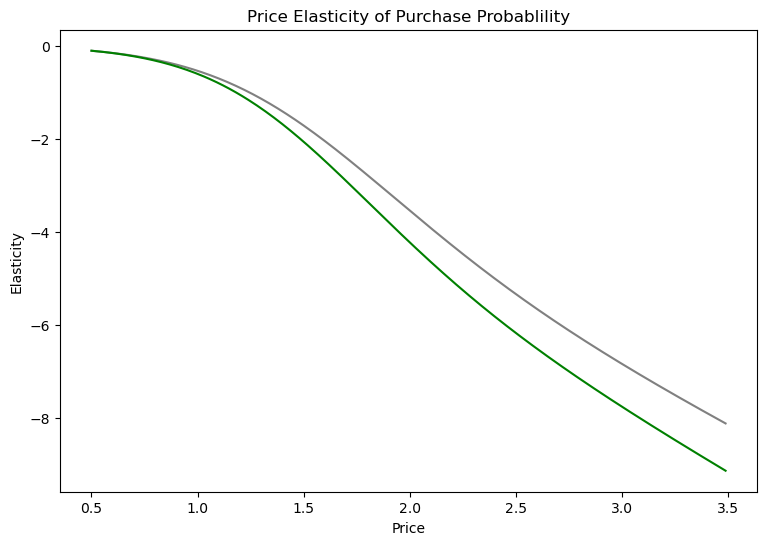

In [25]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Segement 2 - Well-Off	

In [26]:
df_pa_segement_2 = df_pa[df_pa['Segment']==2]

In [27]:
Y=df_pa_segement_2['Incidence']
X=pd.DataFrame()
X['Mean_Price']=(df_pa_segement_2['Price_1'] +\
                 df_pa_segement_2['Price_2'] +\
                 df_pa_segement_2['Price_3'] +\
                 df_pa_segement_2['Price_4'] +\
                 df_pa_segement_2['Price_5'])/5

model_incidence_segment_2 = LogisticRegression(solver = 'sag')
model_incidence_segment_2.fit(X,Y)

# Calculate elasticities
model_incidence_segment_2.coef_

Y_segment_2=model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:,1]
pe_segemnt_2=model_incidence_segment_2.coef_[:,0]* price_range*(1-purchase_pr_segment_2)

## Result

In [28]:
df_price_elasticities['PE_Segment_2']=pe_segemnt_2
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096448,-0.095416,-0.177421
1,0.51,-0.100519,-0.099725,-0.183417
2,0.52,-0.104716,-0.104183,-0.189534
3,0.53,-0.109044,-0.108796,-0.195773
4,0.54,-0.113505,-0.113566,-0.202135
5,0.55,-0.118103,-0.118499,-0.208622
6,0.56,-0.122841,-0.123598,-0.215235
7,0.57,-0.127722,-0.128869,-0.221976
8,0.58,-0.132750,-0.134317,-0.228845
9,0.59,-0.137928,-0.139945,-0.235846


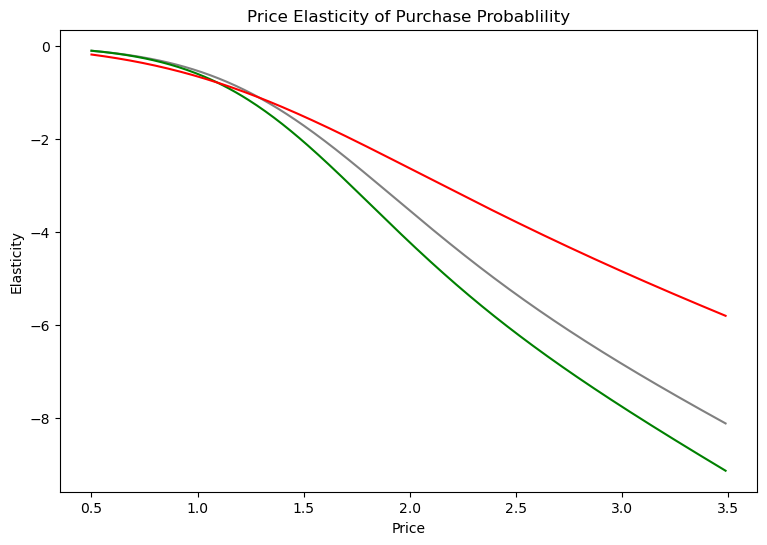

In [29]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.plot(price_range,pe_segemnt_2,color='r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Segement 0 - Standard

In [30]:
df_pa_segement_0 = df_pa[df_pa['Segment']==0]

In [31]:
Y=df_pa_segement_0['Incidence']
X=pd.DataFrame()
X['Mean_Price']=(df_pa_segement_0['Price_1'] +\
                 df_pa_segement_0['Price_2'] +\
                 df_pa_segement_0['Price_3'] +\
                 df_pa_segement_0['Price_4'] +\
                 df_pa_segement_0['Price_5'])/5

model_incidence_segment_0 = LogisticRegression(solver = 'sag')
model_incidence_segment_0.fit(X,Y)

# Calculate elasticities
model_incidence_segment_0.coef_

Y_segment_0=model_incidence_segment_0.predict_proba(df_price_range)
purchase_pr_segment_0 = Y_segment_0[:][:,1]
pe_segemnt_0=model_incidence_segment_0.coef_[:,0]* price_range*(1-purchase_pr_segment_0)

## Result

In [32]:
df_price_elasticities['PE_Segment_0']=pe_segemnt_0
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970


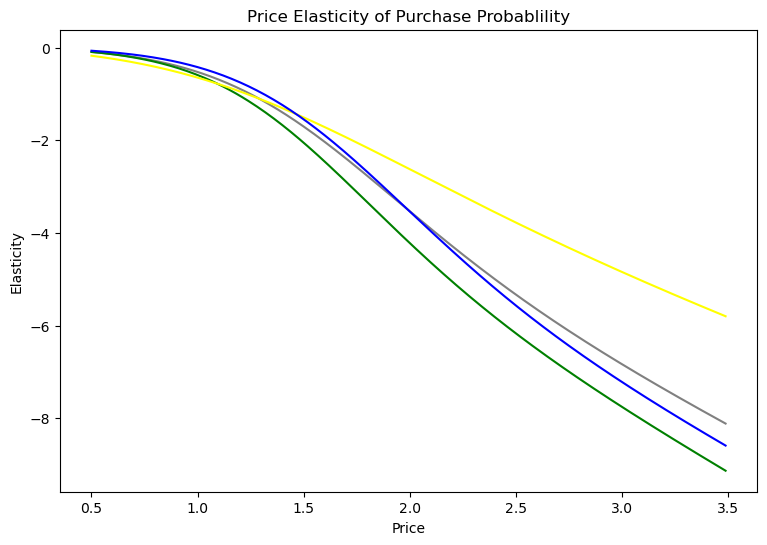

In [33]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.plot(price_range,pe_segemnt_2,color='yellow')
plt.plot(price_range,pe_segemnt_0,color='b')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Segement 3 - Fever-Opportunities

In [34]:
df_pa_segement_3 = df_pa[df_pa['Segment']==3]

In [35]:
Y=df_pa_segement_3['Incidence']
X=pd.DataFrame()
X['Mean_Price']=(df_pa_segement_3['Price_1'] +\
                 df_pa_segement_3['Price_2'] +\
                 df_pa_segement_3['Price_3'] +\
                 df_pa_segement_3['Price_4'] +\
                 df_pa_segement_3['Price_5'])/5

model_incidence_segment_3 = LogisticRegression(solver = 'sag')
model_incidence_segment_3.fit(X,Y)

# Calculate elasticities
model_incidence_segment_3.coef_

Y_segment_3=model_incidence_segment_3.predict_proba(df_price_range)
purchase_pr_segment_3 = Y_segment_3[:][:,1]
pe_segemnt_3=model_incidence_segment_3.coef_[:,0]* price_range*(1-purchase_pr_segment_3)

## Result

In [36]:
df_price_elasticities['PE_Segment_3']=pe_segemnt_3
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991


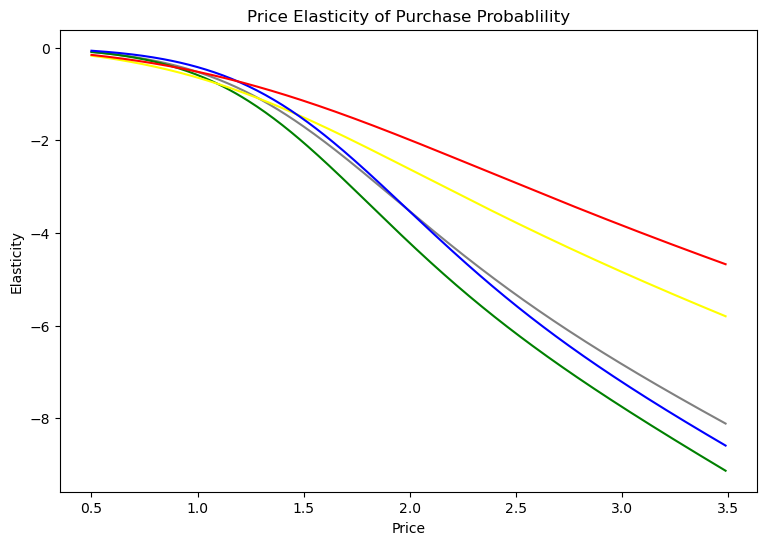

In [37]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segemnt_1,color='green')
plt.plot(price_range,pe_segemnt_2,color='yellow')
plt.plot(price_range,pe_segemnt_0,color='b')
plt.plot(price_range,pe_segemnt_3,color='r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probablility')
plt.show()


## Purchase Probability with promotion Feature

### Data Prearation

In [38]:
Y=df_pa['Incidence']

In [39]:
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1'] +\
                 df_pa['Price_2'] +\
                 df_pa['Price_3'] +\
                 df_pa['Price_4'] +\
                 df_pa['Price_5'])/5

In [40]:
X['Mean_Promotion']=(df_pa['Promotion_1'] +\
                 df_pa['Promotion_2'] +\
                 df_pa['Promotion_3'] +\
                 df_pa['Promotion_4'] +\
                 df_pa['Promotion_5'])/5

In [41]:
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [42]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49405371,  0.56147686]])

## Price Elasticity with Promotion

In [43]:
# df_price_elasticities_promotion = pd.DataFrame(price_range)
# df_price_elasticities_promotion=df_price_elasticities_promotion.rename(columns={0:'Price_range'})

In [44]:
df_price_elasticities_promotion = pd.DataFrame(price_range)
df_price_elasticities_promotion=df_price_elasticities_promotion.rename(columns={0:'Mean_Price'})

In [45]:
# df_price_elasticities_promotion['Promotion']=1

In [46]:
df_price_elasticities_promotion['Mean_Promotion']=1

In [47]:
df_price_elasticities_promotion

,Mean_Price,Mean_Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
5,0.55,1
6,0.56,1
7,0.57,1
8,0.58,1
9,0.59,1


In [48]:
Y_promotion=model_incidence_promotion.predict_proba(df_price_elasticities_promotion)

In [49]:
promo=Y_promotion[:,1]
price_elasticity_promo=(model_incidence_promotion.coef_[:,0] * price_range) * (1-promo)

In [50]:
df_price_elasticities['Elasticity_Promotion_1']=price_elasticity_promo
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914,-0.147144
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302,-0.151666
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776,-0.156271
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339,-0.160962
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991,-0.165738


## Price Elasticity with No Promotion

In [51]:
df_price_elasticities_promotion = pd.DataFrame(price_range)
df_price_elasticities_promotion=df_price_elasticities_promotion.rename(columns={0:'Mean_Price'})

In [52]:
df_price_elasticities_promotion['Mean_Promotion']=0

In [53]:
df_price_elasticities_promotion

,Mean_Price,Mean_Promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0
5,0.55,0
6,0.56,0
7,0.57,0
8,0.58,0
9,0.59,0


In [54]:
Y_promotion=model_incidence_promotion.predict_proba(df_price_elasticities_promotion)

In [55]:
promo=Y_promotion[:,1]
price_elasticity_no_promo=(model_incidence_promotion.coef_[:,0] * price_range) * (1-promo)

In [56]:
df_price_elasticities['Elasticity_Promotion_0']=price_elasticity_no_promo
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914,-0.147144,-0.227320
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302,-0.151666,-0.233963
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776,-0.156271,-0.240712
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339,-0.160962,-0.247569
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991,-0.165738,-0.254533


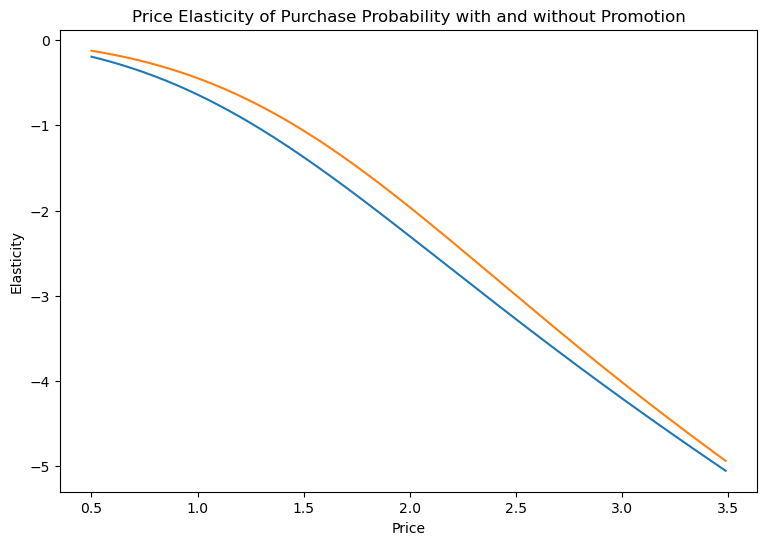

In [57]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_no_promo)
plt.plot(price_range,price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.show()

## Brand Choice

#### Data Preparation

In [58]:
brand_choice =df_pa[df_pa['Incidence']==1]

In [59]:
pd.options.display.max_rows=100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,0,1,0,0,0


In [60]:
Y=brand_choice['Brand']

In [61]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [62]:
features=['Price_1','Price_2','Price_3','Price_4','Price_5']
X=brand_choice[features]

In [63]:
model_brand_choice=LogisticRegression(solver='sag',multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [64]:
model_brand_choice.coef_

array([[-3.91594355,  0.65847017,  2.41778018,  0.70409611, -0.20208954],
       [ 1.27462044, -1.87985114, -0.21261698, -0.20633553,  0.58788038],
       [ 1.62414828,  0.56208457,  0.50073348,  1.03948068,  0.45273696],
       [ 0.57454699,  0.39559366, -1.40057333, -1.24623821,  0.24936249],
       [ 0.44262784,  0.26370274, -1.30532335, -0.29100305, -1.08789029]])

In [65]:
bc_coef=pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915944,0.658470,2.417780,0.704096,-0.202090
1,1.274620,-1.879851,-0.212617,-0.206336,0.587880
2,1.624148,0.562085,0.500733,1.039481,0.452737
3,0.574547,0.395594,-1.400573,-1.246238,0.249362
4,0.442628,0.263703,-1.305323,-0.291003,-1.087890


In [66]:
bc_coef=pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients=['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns = [coefficients]
prices=['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index = [prices]
bc_coef=bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [67]:
df_own_brand_5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5['Price_5']=price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [68]:
predict_brand_5=model_brand_choice.predict_proba(df_own_brand_5)

In [69]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [70]:
beta5=bc_coef.iloc[4,4]
beta5

-1.09

In [71]:
own_price_elasticity_brand_5 = beta5 * price_range * (1-pr_own_brand_5)

In [72]:
df_price_elasticities['Brand_5']=own_price_elasticity_brand_5
pd.options.display.max_rows= None
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676,-0.049055
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798,-0.050616
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023,-0.052207
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351,-0.053827
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783,-0.055477
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914,-0.147144,-0.227320,-0.057158
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302,-0.151666,-0.233963,-0.058871
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776,-0.156271,-0.240712,-0.060615
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339,-0.160962,-0.247569,-0.062391
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991,-0.165738,-0.254533,-0.064199


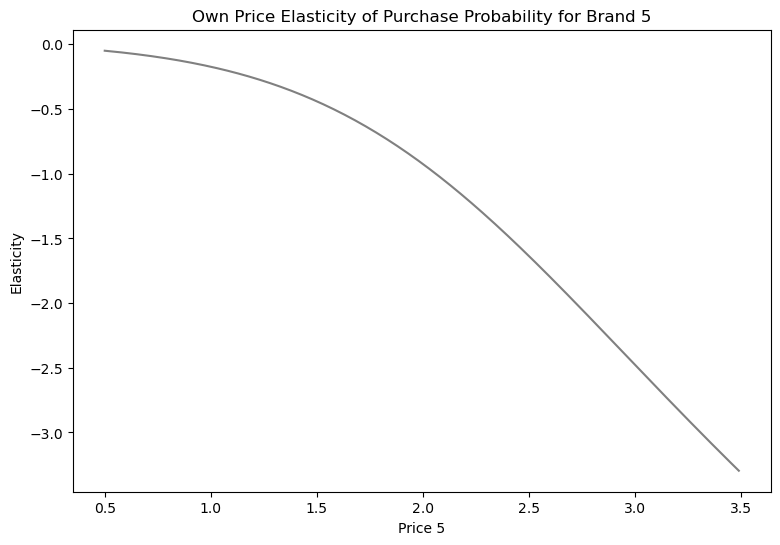

In [73]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5,color='grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.show()

## Cross Price Elasticity Brand 5, Cross Brand 4

In [74]:
df_brand5_cross_brand4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4['Price_1']=brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2']=brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3']=brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4']=price_range
df_brand5_cross_brand4['Price_5']=brand_choice['Price_5'].mean()

In [75]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [76]:
predict_brand5_cross_brand4=model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [77]:
pr_brand_4 =predict_brand5_cross_brand4[:][:, 3]

In [78]:
beta5

-1.09

In [79]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range*pr_brand_4

In [80]:
df_price_elasticities['Brand_5_Cross_Brand_4']=brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676,-0.049055,0.332011
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798,-0.050616,0.337288
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023,-0.052207,0.342507
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351,-0.053827,0.347669
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783,-0.055477,0.352773
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914,-0.147144,-0.227320,-0.057158,0.357820
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302,-0.151666,-0.233963,-0.058871,0.362809
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776,-0.156271,-0.240712,-0.060615,0.367741
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339,-0.160962,-0.247569,-0.062391,0.372614
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991,-0.165738,-0.254533,-0.064199,0.377430


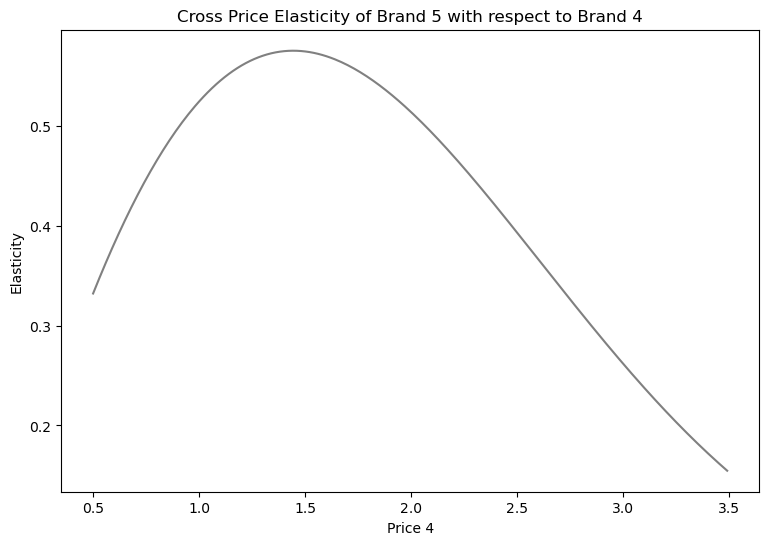

In [81]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity,color='grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 with respect to Brand 4')
plt.show()

## Own and Cross- Price Elasticity by Segemnt

### Well_off

In [82]:
brand_choice_s2=df_pa[df_pa['Incidence']==1]
brand_choice_s2=brand_choice_s2[brand_choice_s2['Segment']==2]
pd.options.display.max_rows=100
brand_choice_s2

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2740,200000027,149,1,1,3,0,0,1.39,1.90,1.99,2.16,2.64,1,0,0,0,0,1,1,33,1,112422,1,1,2,0,0,1,0
2742,200000027,164,1,2,5,0,0,1.39,1.90,1.94,2.16,2.61,1,0,0,0,0,1,1,33,1,112422,1,1,2,0,0,1,0
2748,200000027,197,1,3,1,0,0,1.35,1.57,1.99,2.16,2.66,0,1,0,0,0,1,1,33,1,112422,1,1,2,0,0,1,0
2752,200000027,221,1,1,3,0,0,1.29,1.89,1.95,2.13,2.67,1,1,0,1,0,1,1,33,1,112422,1,1,2,0,0,1,0
2765,200000027,290,1,2,2,0,0,1.49,1.89,2.00,2.17,2.67,0,0,0,0,0,1,1,33,1,112422,1,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,200000498,579,1,3,5,3,1,1.22,1.89,2.01,2.14,2.73,0,1,0,0,0,1,1,29,1,114784,1,0,2,0,0,1,0
58444,200000498,626,1,3,3,0,0,1.48,1.57,2.06,2.24,2.79,0,0,1,0,0,1,1,29,1,114784,1,0,2,0,0,1,0
58450,200000498,657,1,2,5,0,0,1.26,1.88,2.06,2.24,2.79,0,0,0,0,0,1,1,29,1,114784,1,0,2,0,0,1,0
58453,200000498,675,1,2,5,0,0,1.42,1.85,2.06,2.24,2.77,0,1,0,0,0,1,1,29,1,114784,1,0,2,0,0,1,0


In [83]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.82,1.31,1.49,-0.24,0.26
Price_2,1.32,-1.85,0.41,0.08,0.04
Price_3,0.91,-0.60,0.30,-0.06,-0.54
Price_4,0.38,-0.31,0.85,-1.10,0.17
Price_5,-0.31,1.14,0.34,-0.37,-0.80


## Own-Brand Price Elasticity


In [84]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities['Brand 5 S2'] = own_price_elasticity_brand_5_s2

## Cross-Brand Price Elasticity

In [85]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities['Brand_5_Cross_Brand_4_S2'] = brand5_cross_brand4_price_elasticity_s2
pd.options.display.max_rows = None
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676,-0.049055,0.332011,-0.146440,0.184824
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798,-0.050616,0.337288,-0.150054,0.187239
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023,-0.052207,0.342507,-0.153699,0.189607
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351,-0.053827,0.347669,-0.157374,0.191928
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783,-0.055477,0.352773,-0.161080,0.194202
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914,-0.147144,-0.227320,-0.057158,0.357820,-0.164817,0.196430
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302,-0.151666,-0.233963,-0.058871,0.362809,-0.168586,0.198612
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776,-0.156271,-0.240712,-0.060615,0.367741,-0.172385,0.200747
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339,-0.160962,-0.247569,-0.062391,0.372614,-0.176217,0.202837
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991,-0.165738,-0.254533,-0.064199,0.377430,-0.180081,0.204881


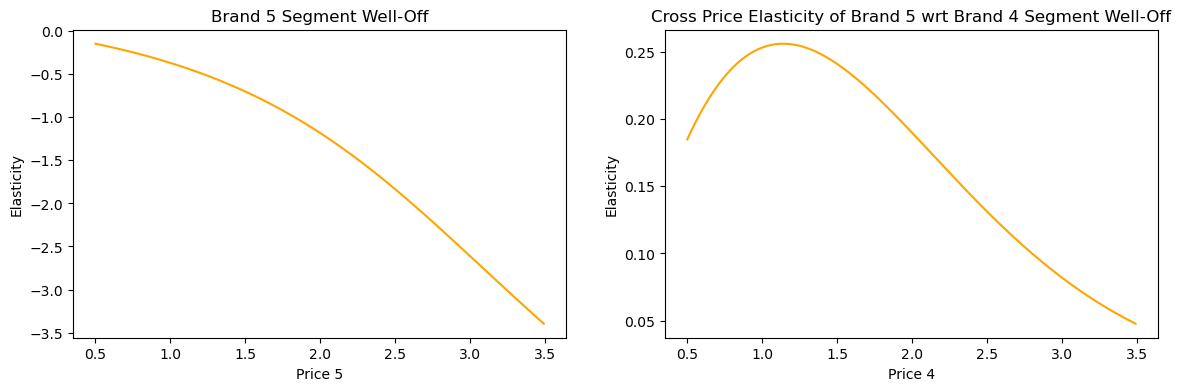

In [86]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s2, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

## Standard

In [87]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,0,1,0,0,0


In [88]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own-Brand Price Elasticity

In [89]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

## Cross-Brand Price Elasticity

In [90]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

## Career-Focused

In [91]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [92]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own-Brand Price Elasticity

In [93]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

## Cross-Brand Price Elasticity 

In [94]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

## Fewer-Opportunities

In [95]:
# Filter data, select only purchases from segment 3, which is the Fewer-Opportunities segment.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

In [96]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own-Brand Price Elasticity

In [97]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities.insert(14, column = 'Brand 5 S3', value = own_price_elasticity_brand_5_s3)

## Cross-Brand Price Elasticity

In [98]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S3', value = brand5_cross_brand4_price_elasticity_s3)
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676,-0.049055,0.332011,-0.035728,0.199398,-0.003329,0.245866,-0.316408,0.474975,-0.146440,0.184824
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798,-0.050616,0.337288,-0.036751,0.201853,-0.003507,0.249004,-0.322794,0.484119,-0.150054,0.187239
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023,-0.052207,0.342507,-0.037789,0.204254,-0.003692,0.252073,-0.329187,0.493246,-0.153699,0.189607
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351,-0.053827,0.347669,-0.038842,0.206600,-0.003886,0.255073,-0.335588,0.502358,-0.157374,0.191928
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783,-0.055477,0.352773,-0.039910,0.208892,-0.004088,0.258004,-0.341997,0.511452,-0.161080,0.194202
5,0.55,-0.118103,-0.118499,-0.208622,-0.085774,-0.184914,-0.147144,-0.227320,-0.057158,0.357820,-0.040994,0.211129,-0.004300,0.260866,-0.348415,0.520531,-0.164817,0.196430
6,0.56,-0.122841,-0.123598,-0.215235,-0.089390,-0.190302,-0.151666,-0.233963,-0.058871,0.362809,-0.042093,0.213313,-0.004521,0.263661,-0.354843,0.529593,-0.168586,0.198612
7,0.57,-0.127722,-0.128869,-0.221976,-0.093126,-0.195776,-0.156271,-0.240712,-0.060615,0.367741,-0.043207,0.215444,-0.004751,0.266387,-0.361279,0.538638,-0.172385,0.200747
8,0.58,-0.132750,-0.134317,-0.228845,-0.096985,-0.201339,-0.160962,-0.247569,-0.062391,0.372614,-0.044338,0.217522,-0.004992,0.269045,-0.367726,0.547666,-0.176217,0.202837
9,0.59,-0.137928,-0.139945,-0.235846,-0.100970,-0.206991,-0.165738,-0.254533,-0.064199,0.377430,-0.045485,0.219547,-0.005244,0.271636,-0.374183,0.556677,-0.180081,0.204881


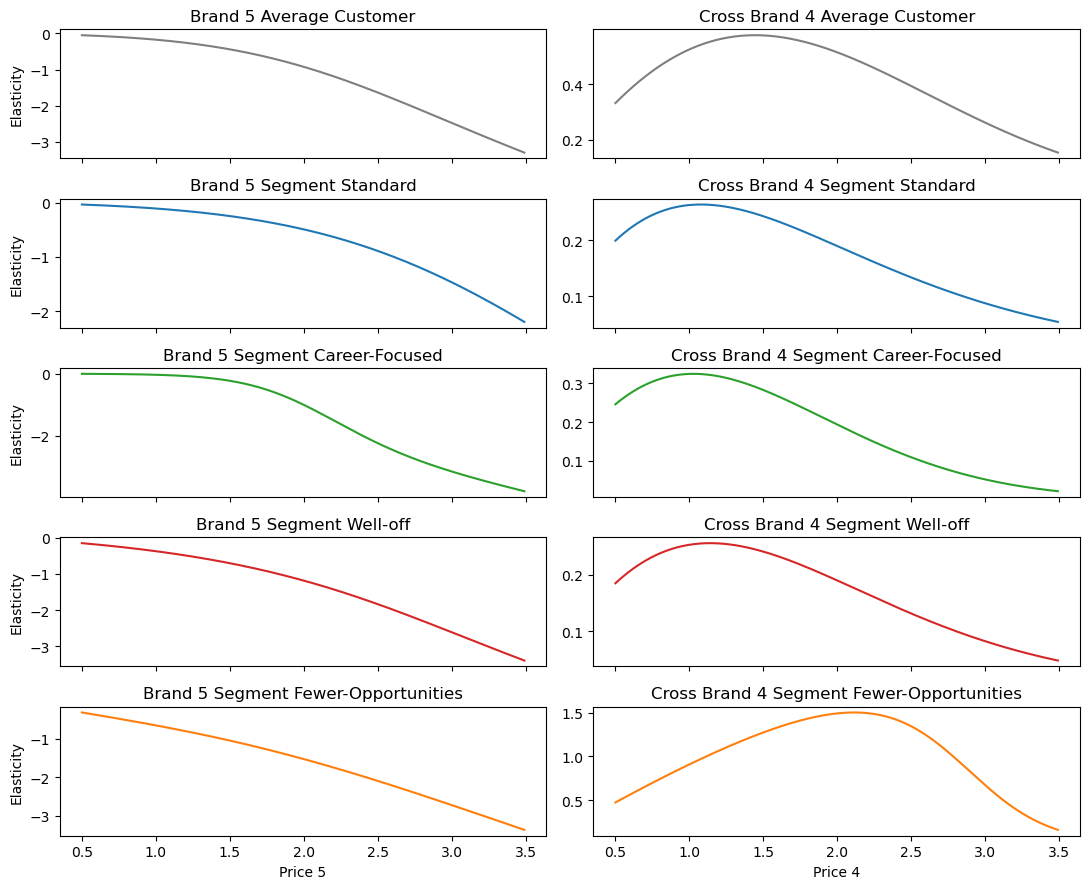

In [99]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Well-off')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Well-off')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')
ax5[1].set_xlabel('Price 4')
plt.tight_layout()

## Price Elasticity of Purchase Quantity

In [100]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,0,1,0,0,0


In [101]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,2.654296,0.372455,0.349638,0.043858,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.255431,0.346359,0.282211,0.141071,0.230359,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,0.097724,0.483475,0.476872,0.204787,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.159187,0.475825,0.450091,0.348107,0.421077,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [103]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [104]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation. Linear Regression

In [105]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [106]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [107]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [108]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [109]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [110]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684998

In [111]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [112]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [113]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S2,Brand_5_Cross_Brand_4_S2,PE_Quantity_Promotion_1
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676,-0.049055,0.332011,-0.035728,0.199398,-0.003329,0.245866,-0.316408,0.474975,-0.146440,0.184824,-0.102157
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798,-0.050616,0.337288,-0.036751,0.201853,-0.003507,0.249004,-0.322794,0.484119,-0.150054,0.187239,-0.104413
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023,-0.052207,0.342507,-0.037789,0.204254,-0.003692,0.252073,-0.329187,0.493246,-0.153699,0.189607,-0.106679
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351,-0.053827,0.347669,-0.038842,0.206600,-0.003886,0.255073,-0.335588,0.502358,-0.157374,0.191928,-0.108954
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783,-0.055477,0.352773,-0.039910,0.208892,-0.004088,0.258004,-0.341997,0.511452,-0.161080,0.194202,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014235,-9.023257,-5.723669,-8.482865,-4.609931,-4.861801,-4.983373,-3.231571,0.162236,-2.131819,0.056735,-3.727630,0.023298,-3.311367,0.185561,-3.334103,0.050022,-1.774292
296,3.46,-8.039486,-9.050688,-5.742633,-8.509737,-4.626591,-4.880002,-5.000280,-3.247765,0.160336,-2.147838,0.056158,-3.739530,0.022858,-3.324543,0.179407,-3.349706,0.049444,-1.788634
297,3.47,-8.064703,-9.078093,-5.761572,-8.536567,-4.643229,-4.898173,-5.017166,-3.263927,0.158450,-2.163903,0.055585,-3.751400,0.022425,-3.337718,0.173428,-3.365283,0.048871,-1.803124
298,3.48,-8.089886,-9.105473,-5.780487,-8.563356,-4.659844,-4.916313,-5.034032,-3.280057,0.156579,-2.180012,0.055016,-3.763241,0.022000,-3.350894,0.167622,-3.380833,0.048303,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

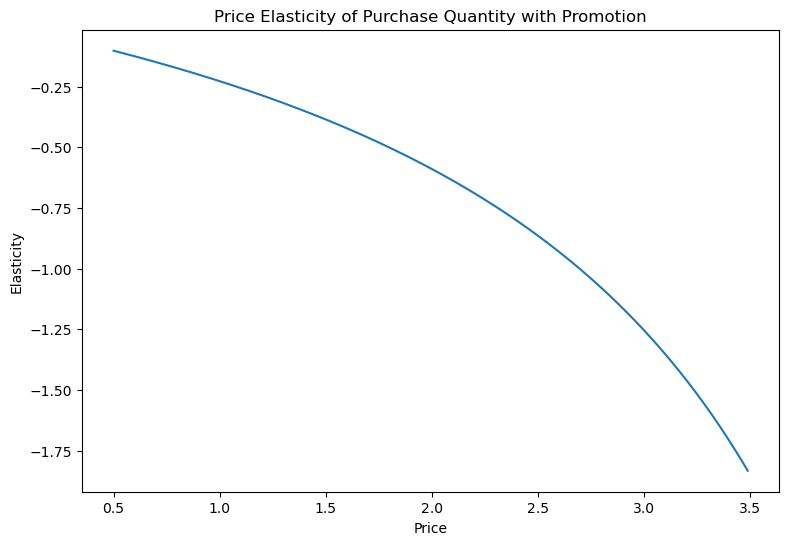

In [114]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

## Price Elasticity of Purchase Quantity

In [115]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_0,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S3,Brand_5_Cross_Brand_4_S3,Brand 5 S2,Brand_5_Cross_Brand_4_S2,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096448,-0.095416,-0.177421,-0.069371,-0.159261,-0.125759,-0.195676,-0.049055,0.332011,-0.035728,0.199398,-0.003329,0.245866,-0.316408,0.474975,-0.146440,0.184824,-0.102157,-0.099543
1,0.51,-0.100519,-0.099725,-0.183417,-0.072437,-0.164223,-0.129876,-0.201798,-0.050616,0.337288,-0.036751,0.201853,-0.003507,0.249004,-0.322794,0.484119,-0.150054,0.187239,-0.104413,-0.101736
2,0.52,-0.104716,-0.104183,-0.189534,-0.075608,-0.169269,-0.134072,-0.208023,-0.052207,0.342507,-0.037789,0.204254,-0.003692,0.252073,-0.329187,0.493246,-0.153699,0.189607,-0.106679,-0.103939
3,0.53,-0.109044,-0.108796,-0.195773,-0.078886,-0.174399,-0.138348,-0.214351,-0.053827,0.347669,-0.038842,0.206600,-0.003886,0.255073,-0.335588,0.502358,-0.157374,0.191928,-0.108954,-0.106150
4,0.54,-0.113505,-0.113566,-0.202135,-0.082273,-0.179613,-0.142705,-0.220783,-0.055477,0.352773,-0.039910,0.208892,-0.004088,0.258004,-0.341997,0.511452,-0.161080,0.194202,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014235,-9.023257,-5.723669,-8.482865,-4.609931,-4.861801,-4.983373,-3.231571,0.162236,-2.131819,0.056735,-3.727630,0.023298,-3.311367,0.185561,-3.334103,0.050022,-1.774292,-1.664290
296,3.46,-8.039486,-9.050688,-5.742633,-8.509737,-4.626591,-4.880002,-5.000280,-3.247765,0.160336,-2.147838,0.056158,-3.739530,0.022858,-3.324543,0.179407,-3.349706,0.049444,-1.788634,-1.677205
297,3.47,-8.064703,-9.078093,-5.761572,-8.536567,-4.643229,-4.898173,-5.017166,-3.263927,0.158450,-2.163903,0.055585,-3.751400,0.022425,-3.337718,0.173428,-3.365283,0.048871,-1.803124,-1.690246
298,3.48,-8.089886,-9.105473,-5.780487,-8.563356,-4.659844,-4.916313,-5.034032,-3.280057,0.156579,-2.180012,0.055016,-3.763241,0.022000,-3.350894,0.167622,-3.380833,0.048303,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

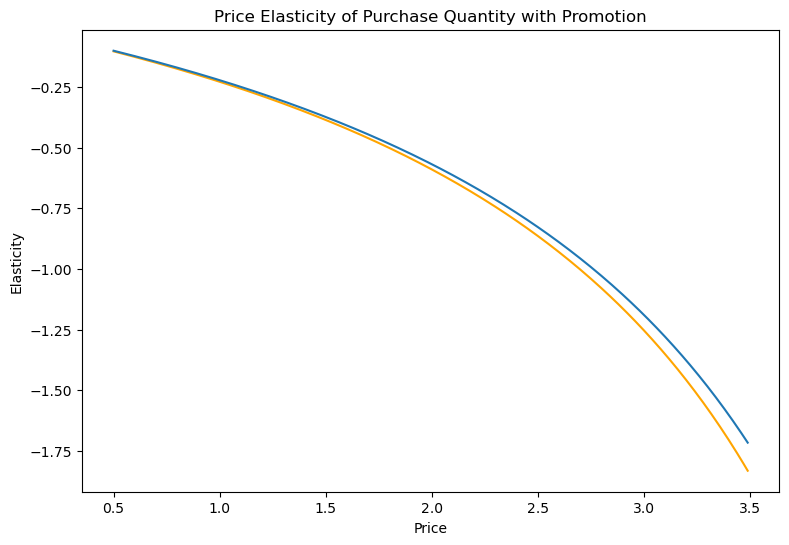

In [116]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')